In [2]:
from os import listdir
import numpy as np
import matplotlib.pylab as plt 
from __future__ import division
%matplotlib inline  

col = 'rgb'

def get_path(cam, plane):
    return "../hist/" + cam + "/plane" + str(plane) + "/"

def list_files(cam, plane):
    path = get_path(cam, plane)
    return [path + file for file in listdir(path)]

def file_len(fname):
    with open(fname) as f:
        for i, l in enumerate(f):
            pass
    return i

def read_array(file_reader, n_lines):
    return [[int(i) for i in file_reader.readline().split()] for _ in range(n_lines)]

def read_file(path):
    n = file_len(path)
    with open(path, 'r') as f:
        res = int(f.readline().split()[0])
        hist = read_array(f, n)
    return np.array(hist), res

def convert_3D(hist, res):
    tens = np.zeros([res, res, res])
    for line in hist:
        tens[line[0], line[1], line[2]] = line[3]
    return np.log10(1+9*tens/np.max(np.max(np.max(tens))))*255

def im_color_weight(im, axis):
    n = len(im)
    if axis == 0:
        return im*(np.array([np.arange(n)]).transpose())/n/np.max(np.max(im))
    else:
        return np.array([np.arange(n)])*im/n/np.max(np.max(im))
    
def colorize(im, x, y):
    output = np.zeros([im.shape[0], im.shape[1], 3])
    for i in range(3):
        if x.lower() == col[i]:
            output[:,:,i] = im_color_weight(im, 0)
        elif y.lower() == col[i]:
            output[:,:,i] = im_color_weight(im, 1)
    return output

def plot_hist(hist3, res, colored=True, points=[]):
    plt.figure(figsize=[20,10])
    for c in range(len(col)):
        remaining = range(3)
        remaining.remove(c)
        axis = col[remaining[0]]+col[remaining[1]]
        plt.subplot(1,3,c+1)
        if colored:
            plt.imshow(colorize(np.sum(hist3, axis=c), axis[0], axis[1]))
        else:
            plt.imshow(np.sum(hist3, axis=c))
            #lt.imshow(np.log10(1+9*np.sum(hist3, axis=c)))
        legend = []
        for i in range(len(points)):
            p = points[i]
            plt.plot(p[remaining[1]], p[remaining[0]], "o", markersize=15, color=[p[0]/res, p[1]/res, p[2]/res, 1], markeredgecolor='white', markeredgewidth=1)
            legend += ['cluster ' + str(i)]
        if points != []:
            plt.legend(legend)
        plt.title(axis.upper()+" histogram")
        plt.ylabel(axis[0])
        plt.xlabel(axis[1])
        
def average_hist(hist):
    return np.sum(hist, axis=0) / len(hist)

def process_hist(hist):
    output = []
    for l in hist:
        for _ in range(l[3]):
            output.append(list(l[:3]))
    return output

In [3]:
files = list_files('cam3', 1)

In [4]:
hist, res = read_file(files[0])
hist

array([[  1,   1,   0,   3],
       [  1,   1,   1,   3],
       [  1,   2,   1,  21],
       [  2,   2,   1,  14],
       [  2,   2,   2,   6],
       [  2,   3,   2,  18],
       [  2,   3,   3,   6],
       [  3,   3,   2,   9],
       [  3,   3,   3,  12],
       [  3,   4,   3,   4],
       [  4,   3,   3,   1],
       [  4,   4,   3,   2],
       [  4,   4,   4,   6],
       [  4,   5,   4,   4],
       [  4,   5,   5,   1],
       [  5,   4,   3,   1],
       [  5,   5,   4,   5],
       [  5,   5,   5,  12],
       [  5,   5,   6,   1],
       [  5,   6,   5,  12],
       [  5,   6,   6,   2],
       [  6,   6,   5,   1],
       [  6,   6,   6,   7],
       [  6,   7,   6,   7],
       [  6,   7,   7,   3],
       [  6,   8,   7,   1],
       [  7,   5,   4,   1],
       [  7,   6,   6,   1],
       [  7,   7,   6,   4],
       [  7,   7,   7,   6],
       [  7,   8,   7,   3],
       [  7,   8,   8,   1],
       [  8,   7,   6,   2],
       [  8,   7,   7,   1],
       [  8,  

In [5]:
hist3 = convert_3D(hist, res)
hist3.shape

(32, 32, 32)

In [6]:
colored=colorize(np.sum(hist3, axis=0), 'r', 'b')
colored.shape

(32, 32, 3)

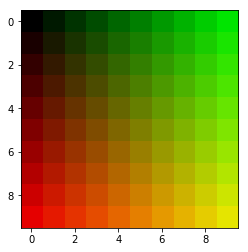

In [7]:
im=np.zeros([10,10,3])
im[:,:,0]=im_color_weight(np.ones([10,10]), 0)
im[:,:,1]=im_color_weight(np.ones([10,10]), 1)
plt.imshow(im[:,:,:])

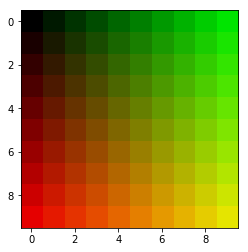

In [8]:
plt.imshow(colorize(np.ones([10,10]), 'r', 'g'))

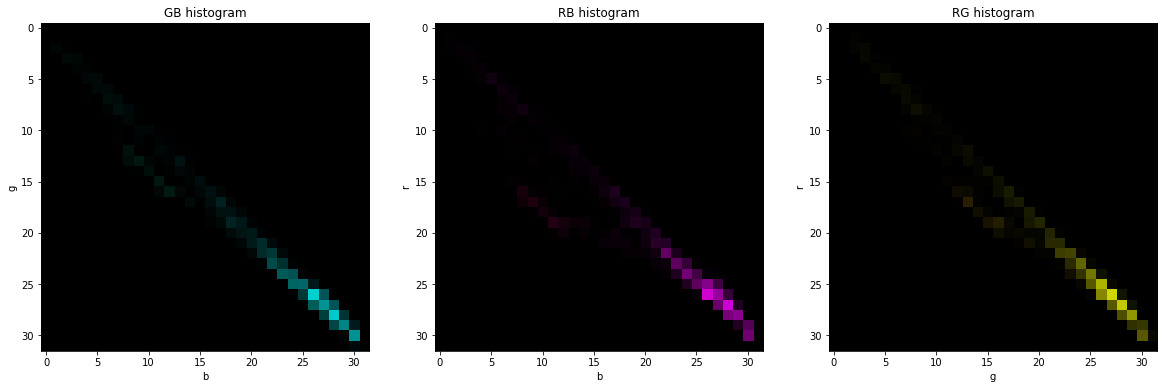

In [9]:
plot_hist(hist3, res, 1)

plane1
	fix


/users/promo2017/smaillot/.local/lib/python2.7/site-packages/ipykernel_launcher.py:15: DeprecationWarning: elementwise == comparison failed; this will raise an error in the future.
  from ipykernel import kernelapp as app


	cam3
plane2
	fix
	cam3
plane3
	fix
	cam3


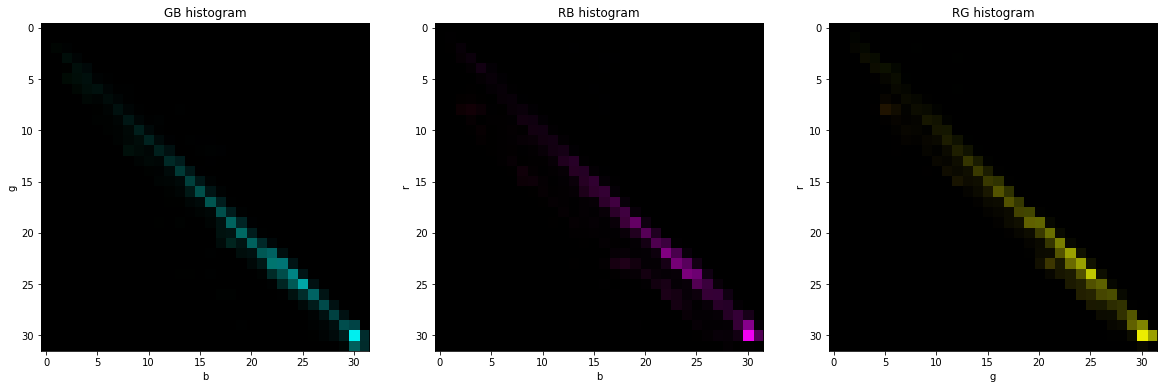

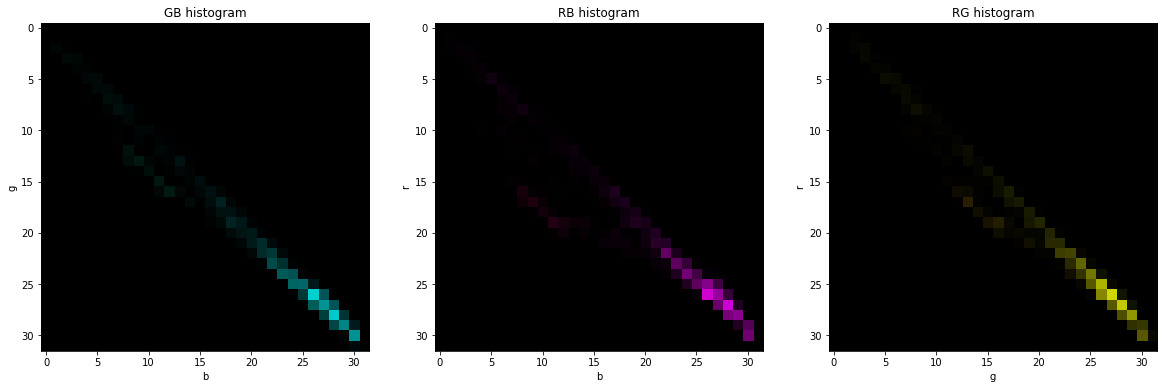

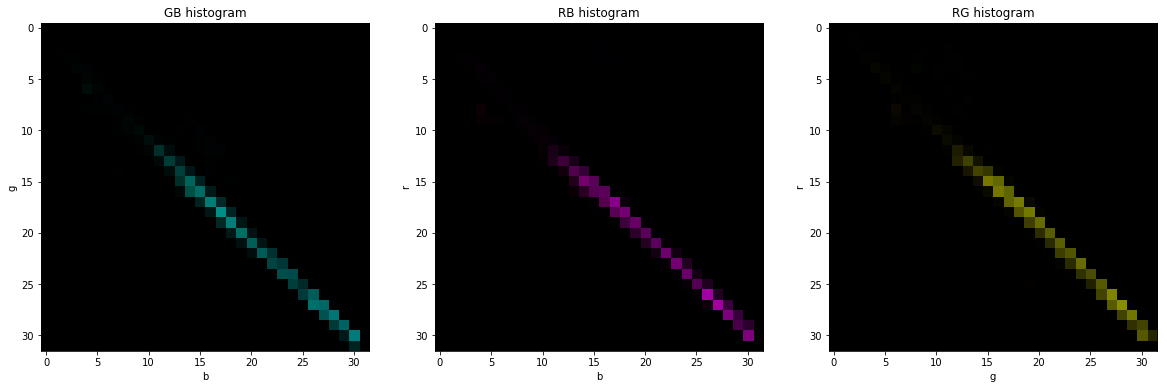

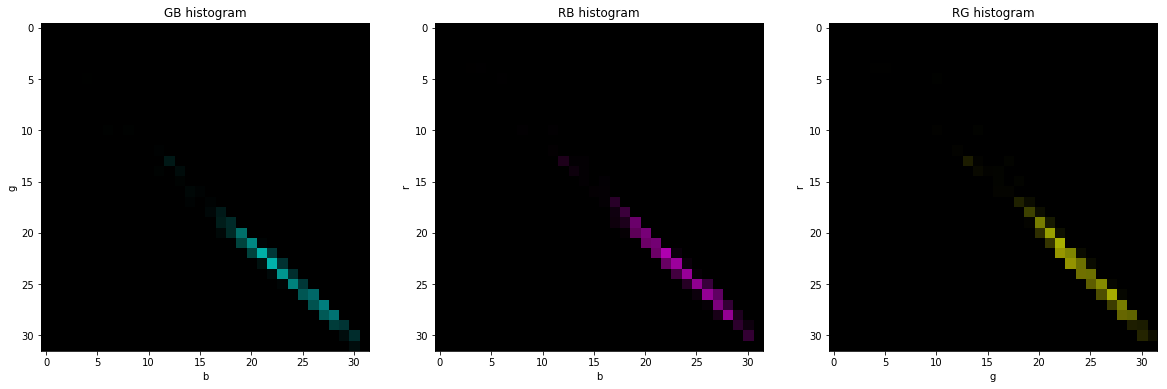

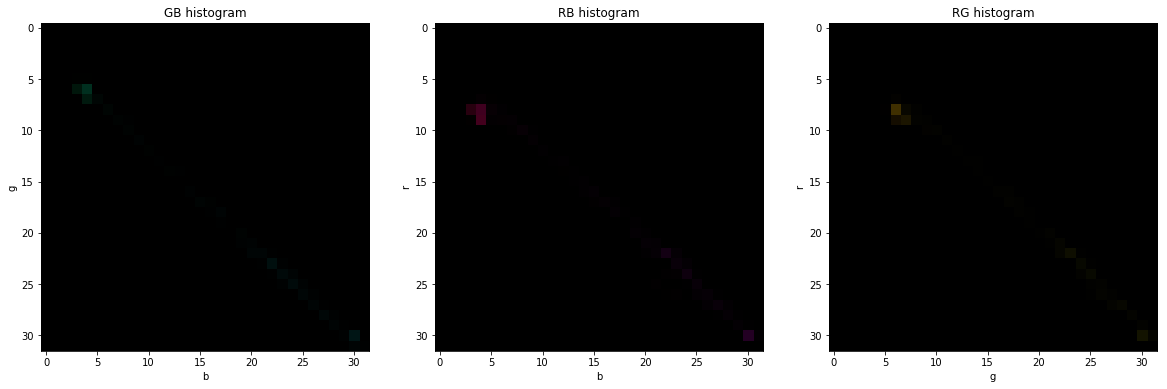

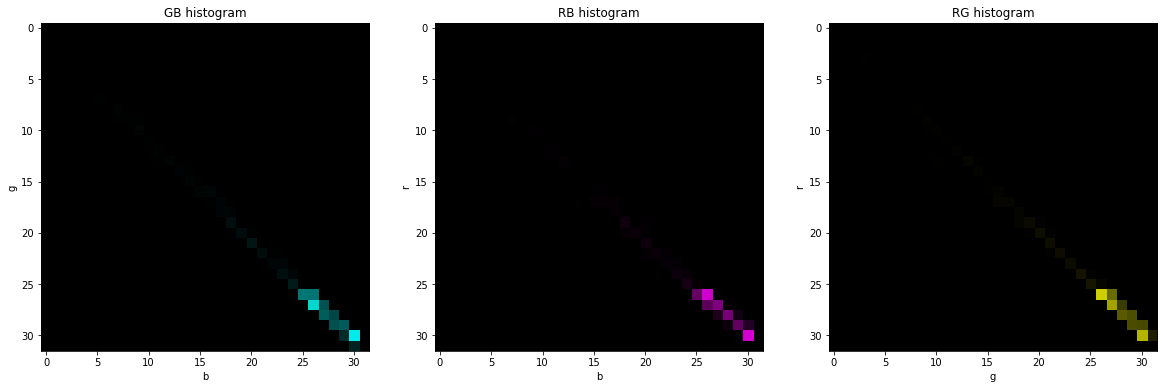

In [10]:
_cams = ['fix', 'cam3']
_planes = [1, 2, 3]

for plane in _planes:
    print("plane" + str(plane))
    for cam in _cams:
        print("\t" + cam)
        files = list_files(cam, plane)
        #ex = np.random.choice(range(len(files)))
        #print("\t" + files[ex])
        sum_hist = []
        for f in files:
            hist, res = read_file(files[0])
            hist3 = convert_3D(hist, res)
            if sum_hist == []:
                sum_hist = hist3
            else:
                sum_hist += hist3
        plot_hist(hist3 / len(files), res, 1)

In [11]:
from sklearn.cluster import KMeans

def clustering(hist, n=3):
    data = process_hist(hist)
    classified = KMeans(n_clusters=n).fit(data)
    return classified
    
hist, res = read_file(files[0])
print process_hist(hist)
kmeans = clustering(hist)

[[0, 1, 0], [3, 3, 2], [3, 3, 2], [3, 3, 3], [4, 5, 4], [7, 7, 5], [8, 7, 6], [8, 8, 7], [8, 8, 7], [9, 7, 5], [9, 8, 7], [9, 9, 7], [9, 9, 8], [10, 9, 9], [10, 10, 9], [10, 10, 9], [11, 11, 10], [12, 12, 11], [12, 12, 11], [13, 10, 9], [13, 13, 11], [13, 13, 12], [13, 13, 12], [13, 13, 12], [13, 14, 13], [14, 14, 13], [14, 14, 14], [15, 15, 14], [16, 15, 14], [16, 16, 16], [16, 16, 16], [17, 16, 15], [17, 16, 15], [17, 16, 16], [17, 17, 16], [17, 17, 17], [17, 17, 17], [18, 18, 17], [18, 18, 17], [19, 18, 18], [19, 18, 18], [19, 19, 18], [19, 19, 18], [19, 19, 18], [19, 19, 18], [19, 19, 18], [19, 20, 20], [20, 19, 18], [20, 20, 18], [20, 20, 19], [20, 20, 19], [20, 20, 19], [20, 20, 19], [20, 20, 19], [20, 21, 20], [21, 21, 20], [21, 21, 20], [21, 21, 20], [21, 21, 20], [21, 21, 20], [21, 21, 20], [22, 21, 20], [22, 22, 21], [22, 22, 21], [22, 22, 21], [22, 22, 21], [22, 22, 22], [23, 23, 22], [23, 23, 22], [23, 23, 23], [23, 23, 23], [24, 24, 23], [24, 24, 23], [24, 24, 23], [24, 24

In [12]:
print kmeans.labels_
print kmeans.cluster_centers_

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 

plane1
	fix


/users/promo2017/smaillot/.local/lib/python2.7/site-packages/ipykernel_launcher.py:71: DeprecationWarning: elementwise != comparison failed; this will raise an error in the future.


	cam3
plane2
	fix
	cam3
plane3
	fix
	cam3


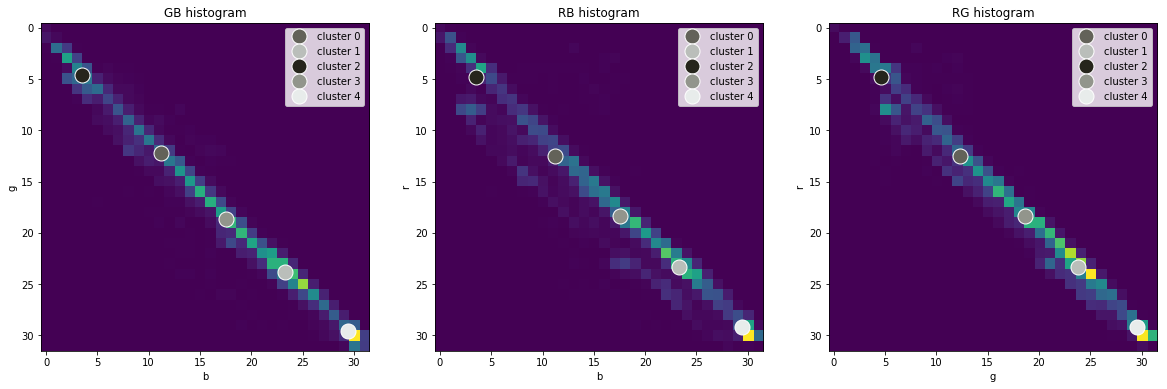

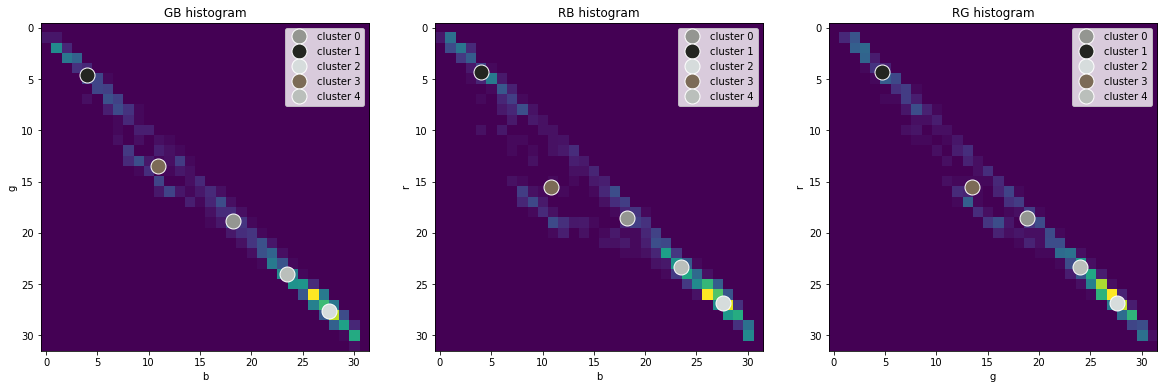

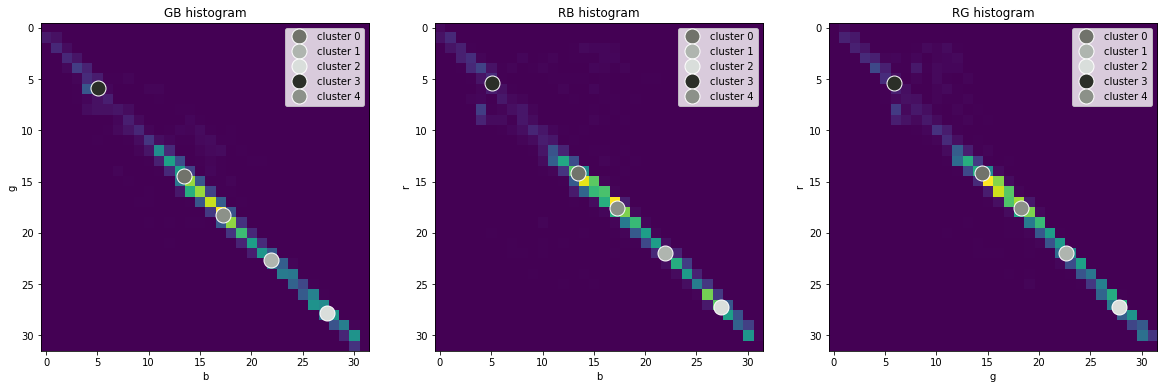

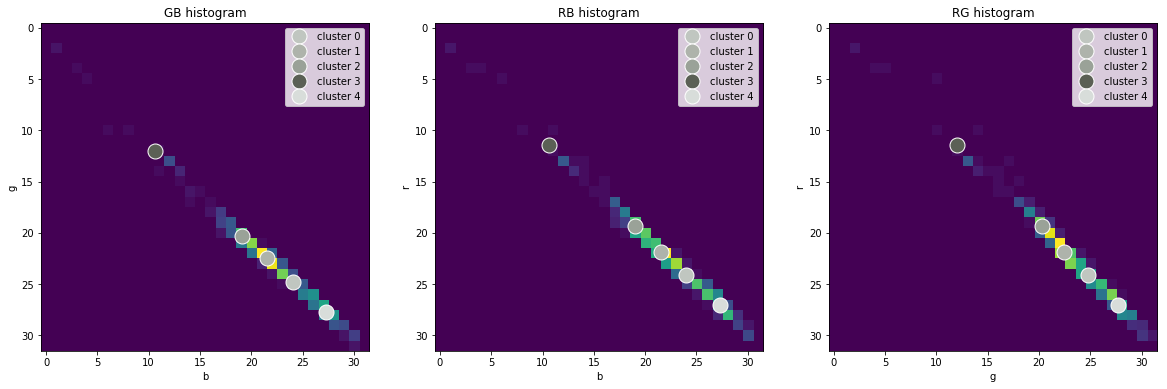

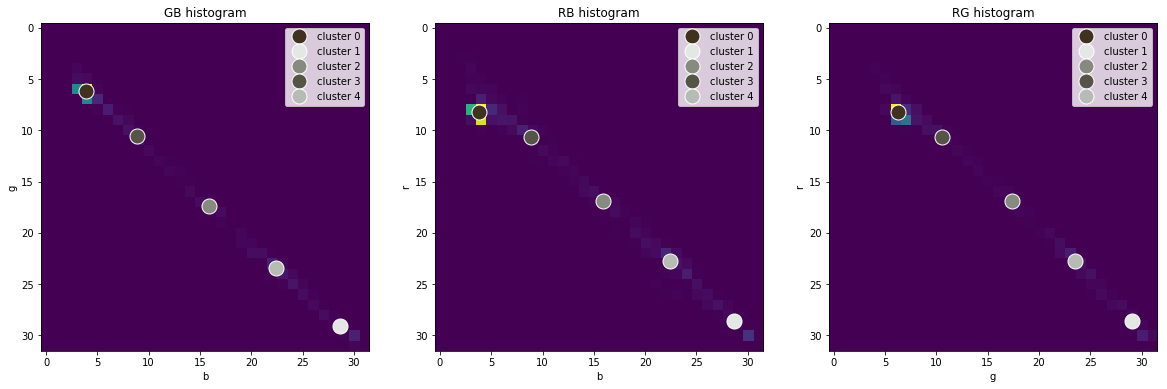

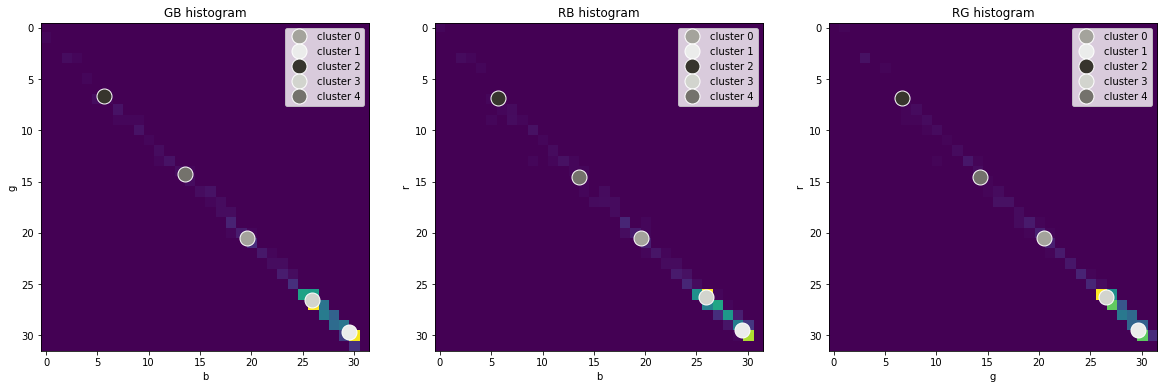

In [65]:
n=5
m=1
clusters = []
for plane in _planes:
    print("plane" + str(plane))
    cluster = np.zeros([res, res, res])
    for cam in _cams:
        print("\t" + cam)
        files = list_files(cam, plane)
        #ex = np.random.choice(range(len(files)))
        #print("\t" + files[ex])
        sum_hist = []
        data = []
        sel_files = files[:m]
        for f in sel_files:
            hist, res = read_file(f)
            data += list(hist)
            hist3 = convert_3D(hist, res)
            if sum_hist == []:
                sum_hist = hist3
            else:
                sum_hist += hist3
        kmeans = clustering(data, n=n)
        average = hist3 / len(sel_files)
        cluster += average/2
        plot_hist(average, res, 0, points=kmeans.cluster_centers_)
    clusters.append(cluster)

In [66]:
print len(clusters)
print clusters[0].shape

3
(32, 32, 32)


In [67]:
def best_fit(f, v=False):
    hist, res = read_file(f)
    hist3 = convert_3D(hist, res)
    distances = []
    for c in range(len(clusters)):
        dist = np.linalg.norm(clusters[c] - hist3)
        distances.append(dist)
        if v:
            print "\t\tplane" + str(_planes[c]) + ": " + str(dist)
    return np.argmin(distances)
            
for plane in _planes:
    print("plane" + str(plane))
    for cam in _cams:
        print("\t" + cam)
        files = list_files(cam, plane)
        ex = np.random.choice(range(len(files)))
        print("\t" + files[ex])
        bf = best_fit(files[ex], 1)
        print "\t\t\tbest fitting: plane" + str(_planes[bf])

plane1
	fix
	../hist/fix/plane1/plane_hist_32_-1879639080.txt
		plane1: 949.1409582647157
		plane2: 1127.0592396746574
		plane3: 1129.485799747813
			best fitting: plane1
	cam3
	../hist/cam3/plane1/plane_hist_32_-1879622080.txt
		plane1: 959.8358801263024
		plane2: 1179.6709253004963
		plane3: 1055.8054479993132
			best fitting: plane1
plane2
	fix
	../hist/fix/plane2/plane_hist_32_-1879764080.txt
		plane1: 683.6940070620005
		plane2: 409.41604286501064
		plane3: 934.6486534390235
			best fitting: plane2
	cam3
	../hist/cam3/plane2/plane_hist_32_-1879795080.txt
		plane1: 757.9349071992934
		plane2: 413.98104085190664
		plane3: 834.1230455781625
			best fitting: plane2
plane3
	fix
	../hist/fix/plane3/plane_hist_32_-1879790080.txt
		plane1: 835.1980579072631
		plane2: 878.2619144087439
		plane3: 295.1005936209359
			best fitting: plane3
	cam3
	../hist/cam3/plane3/plane_hist_32_-1879642080.txt
		plane1: 798.4785557513519
		plane2: 966.7767268906179
		plane3: 642.4011795282099
			best fittin

In [68]:
conf = np.zeros([3,3])
conf2 = np.zeros([6,3])
for plane in _planes:
    for cam in _cams:
        files = list_files(cam, plane)
        for f in files:
            bf = best_fit(f)
            conf[plane-1,bf] += 1
            conf2[(plane-1)*2+(cam==_cams[1]),bf] += 1
            #print cam + "/plane" + str(plane) + "\t->\tplane" + str(_planes[bf])
    print "\n"
print conf
print "\n"
print conf2







[[378.   0.   0.]
 [  7. 366.   4.]
 [  0.   4. 373.]]


[[185.   0.   0.]
 [193.   0.   0.]
 [  1. 183.   0.]
 [  6. 183.   4.]
 [  0.   0. 184.]
 [  0.   4. 189.]]
